In [1]:
import pandas as pd
import numpy as np

df_patient = pd.read_csv('patient_info.csv')
df_disorders = pd.read_csv('disorders.csv')
df_questionnaire = pd.read_csv('questionnaire.csv')
df_base_concen = pd.read_csv('base_concen.csv')

df_patient = df_patient[['Age', 'Gender_id', 'race_id', 'location_id']]
df_disorders.drop(['Patient_ID', 'Depressed', 'ADHD_Type'], axis=1, inplace=True)
df_questionnaire.drop(['Patient_ID', 'BSC_Respondent', 'GSC_Respondent', 'LDS_Respondent'], axis=1, inplace=True)
df_base_concen.drop(['Patient_ID', 'Baseline_header_id', 'Concentration_header_id'], axis=1, inplace=True)

### PCA Utilities

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Plot explained variance ratio
def plot(ex_var_ratio):
    plt.plot(ex_var_ratio)
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Number of Principal Components')

def pca(X, n):
    pca = PCA(n_components=n)
    pca_X = pca.fit_transform(X)
    
    print '\nExplained Variance Ratios:'
    print pca.explained_variance_ratio_
    print '\nSum of Explained Variance Ratios:', 
    print np.sum(pca.explained_variance_ratio_)

    return pca_X, pca.explained_variance_ratio_

In [3]:
from sklearn.decomposition import SparsePCA

# Compute explained variance ratio of transformed data
def compute_explained_variance_ratio(transformed_data):
    explained_variance = np.var(transformed_data, axis=0)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)
    explained_variance_ratio = np.sort(explained_variance_ratio)[::-1]
    return explained_variance_ratio

def sparse_pca(X, n):
    spca = SparsePCA(n_components=n) 
    spca_transform = spca.fit_transform(X)
    ex_var_ratio = compute_explained_variance_ratio(spca_transform)
    return spca_transform, ex_var_ratio

In [4]:
from sklearn.decomposition import KernelPCA

def kernel_pca(X):
    kpca = KernelPCA()
    kpca_transform = kpca.fit_transform(X)
    ex_var_ratio = compute_explained_variance_ratio(kpca_transform)
    return kpca_transform, ex_var_ratio

### Baseline & Concentration Data


Explained Variance Ratios:
[ 0.9577978   0.03984365  0.00149917]

Sum of Explained Variance Ratios: 0.999140620396


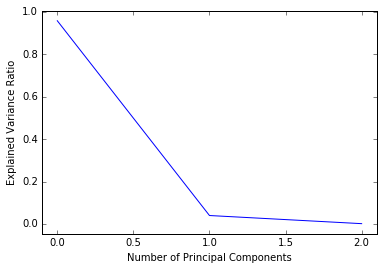

In [5]:
pca_base_concen, ex_var_ratio = pca(df_base_concen.get_values(), 3)
plot(ex_var_ratio)

### Disorder data

/Library/Python/2.7/site-packages/sklearn/linear_model/least_angle.py:162: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif Gram == 'auto':


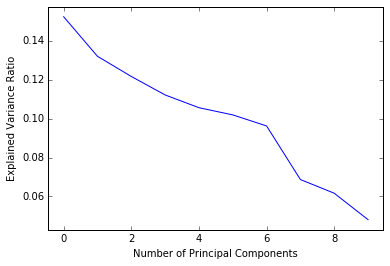

In [6]:
# Keep 10 components for disorder data
spca_disorders, ex_var_ratio = sparse_pca(df_disorders.get_values(), 10)
plot(ex_var_ratio)

### Questionnaire Data

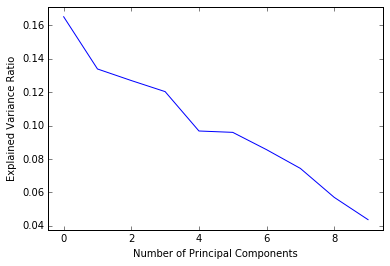

In [8]:
# Keep 10 components for questionnaire data
spca_questionnaire, ex_var_ratio = sparse_pca(df_questionnaire.get_values(), 10)
plot(ex_var_ratio) 

In [9]:
# Put everything together
df_base_concen = pd.DataFrame(pca_base_concen)
df_disorders = pd.DataFrame(spca_disorders)
df_questionnaire = pd.DataFrame(spca_questionnaire)

df = pd.concat([df_patient, df_base_concen, df_disorders, df_questionnaire], axis=1)

print 'Reduced data size is', df.shape

Reduced data size is (2796, 27)


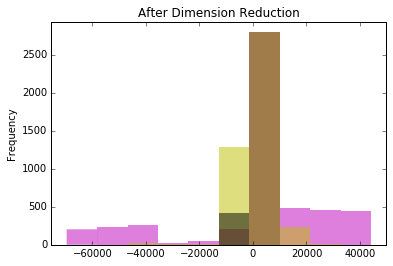

In [10]:
# Have a look at the distribution of reduced data
df.plot(kind='hist', alpha=0.5, legend=None, title='After Dimension Reduction')

In [11]:
# Save reduced features to file
df.to_csv('reduced_data.csv', index=False)